<a href="https://colab.research.google.com/github/Strako/IAProject/blob/main/Perceptron%20diabetes%20529.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

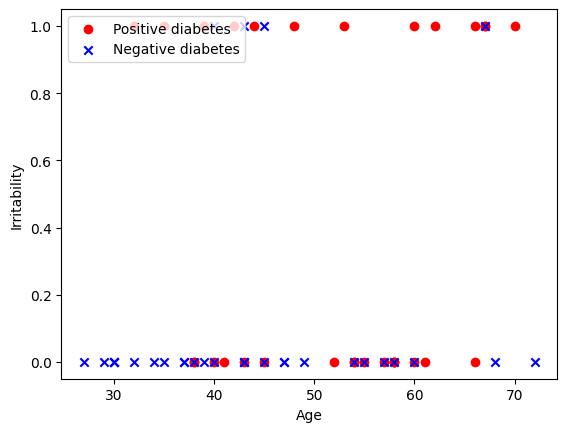

In [25]:
%pip install ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529)

X = early_stage_diabetes_risk_prediction.data.features
y = early_stage_diabetes_risk_prediction.data.targets
featuresX = []
targetsY = np.where(y.values == 'Positive', -1, 1)

def process_rows(X, count, offset=0):
    features = []

    for i in range(count):
        row_features = []
        row_features.append(X.values[i + offset][0])
        for j in range(1, len(X.columns)):
            if X.values[i + offset][j] == "Male" or X.values[i + offset][j] == "No":
                row_features.append(0)
            else:
                row_features.append(1)

        features.append(row_features)

    return features


featuresX += process_rows(X, 30)

featuresX += process_rows(X, 30, offset=202)

featuresX_array = np.array(featuresX)
targetsY_array = np.array(targetsY)


class Perceptron(object):
    def _init_(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      self.errors_ = []

      for _ in range(self.n_iter):
          errors = 0
          for xi, target in zip(X, y):
            update = self.eta * (target - self.predict(xi))
            self.w[1:] += update * xi
            self.w[0] += update
            errors += int(update != 0.0)
          self.errors_.append(errors)
      return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

plt.scatter(featuresX_array[:30, 0], featuresX_array[:30, 10],
            color='red', marker='o', label='Positive diabetes')
plt.scatter(featuresX_array[30:60, 0], featuresX_array[30:60, 10],
            color='blue', marker='x', label='Negative diabetes')



plt.xlabel('Age')
plt.ylabel('Irritability')
plt.legend(loc='upper left')
plt.show()
